# Load data from file

In [112]:
import ast
import pandas as pd
import os
import ast

import tensorflow as tf
import numpy as np

In [113]:
mypath = "."
folder_name='archive/'
file_path = f'{mypath}/{folder_name}/'

filename = os.path.join(file_path, 'RAW_recipes.csv')
RAW_recipes_df = pd.read_csv(filename)
RAW_recipes_df = RAW_recipes_df.dropna()
RAW_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


# Steps

<AxesSubplot:>

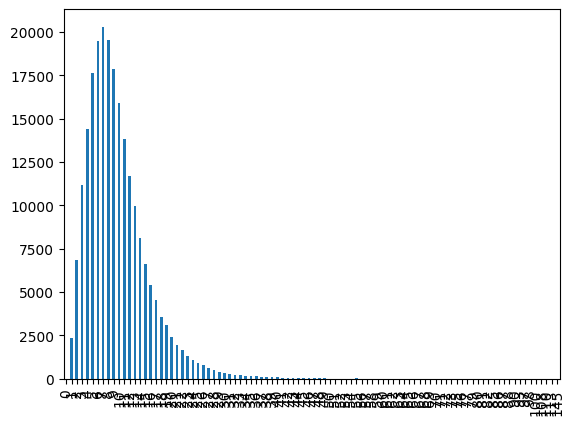

In [114]:
RAW_recipes_df['n_steps'].value_counts().sort_index().plot.bar()

In [115]:
RAW_recipes_df.shape

(226657, 12)

In [116]:
# RAW_recipes_df = RAW_recipes_df.loc[(RAW_recipes_df['n_steps'] > 3) & (RAW_recipes_df['n_steps'] < 10)]
RAW_recipes_df = RAW_recipes_df.loc[(RAW_recipes_df['n_steps'] > 3)]

In [117]:
RAW_recipes_df.shape

(206275, 12)

## Tokens

In [118]:
step_list = [ ast.literal_eval(rec) for rec in RAW_recipes_df['steps'].to_list()]
step_list = [' <step> '.join(steps) for steps in step_list]
step_list[0]

'make a choice and proceed with recipe <step> depending on size of squash , cut into half or fourths <step> remove seeds <step> for spicy squash , drizzle olive oil or melted butter over each cut squash piece <step> season with mexican seasoning mix ii <step> for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece <step> season with sweet mexican spice mix <step> bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin <step> be careful not to burn the squash especially if you opt to use sugar or butter <step> if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking <step> if desired , season with salt'

In [119]:
num_tokens = [len(steps) for steps in step_list]
RAW_recipes_df['n_tokens'] = num_tokens

<AxesSubplot:>

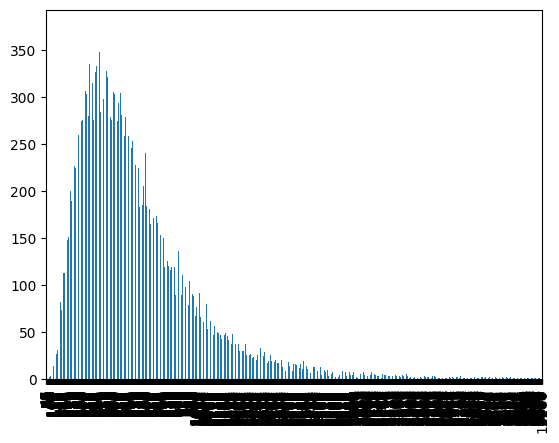

In [120]:
RAW_recipes_df['n_tokens'].value_counts().sort_index().plot.bar()

In [138]:
# RAW_recipes_df = RAW_recipes_df.loc[(RAW_recipes_df['n_tokens'] > 20) & (RAW_recipes_df['n_tokens'] < 256)]
RAW_recipes_df_cut = RAW_recipes_df.loc[(RAW_recipes_df['n_tokens'] > 20) & (RAW_recipes_df['n_tokens'] < 512)]

In [139]:
RAW_recipes_df_cut.shape

(91437, 13)

## Token Frequency

In [123]:
step_list = [ ast.literal_eval(rec) for rec in RAW_recipes_df['steps'].to_list()]
# combine steps to single string
step_list = [' [step] '.join(steps) for steps in step_list]

# add end-Token 
step_list = [f'{steps} [end]' for steps in step_list]

In [124]:
step_list[1]

'preheat oven to 425 degrees f [step] press dough into the bottom and sides of a 12 inch pizza pan [step] bake for 5 minutes until set but not browned [step] cut sausage into small pieces [step] whisk eggs and milk in a bowl until frothy [step] spoon sausage over baked crust and sprinkle with cheese [step] pour egg mixture slowly over sausage and cheese [step] s& p to taste [step] bake 15-20 minutes or until eggs are set and crust is brown [end]'

## Add Padding

In [125]:
#RAW_recipes_df.shape
name_list = RAW_recipes_df['name'].to_list()
name_list = [sub.replace('  ', ' ') for sub in name_list]

In [126]:
for name in name_list:
    if type(name) is float:
        print(name)

In [127]:
step_list[0]

'make a choice and proceed with recipe [step] depending on size of squash , cut into half or fourths [step] remove seeds [step] for spicy squash , drizzle olive oil or melted butter over each cut squash piece [step] season with mexican seasoning mix ii [step] for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece [step] season with sweet mexican spice mix [step] bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin [step] be careful not to burn the squash especially if you opt to use sugar or butter [step] if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking [step] if desired , season with salt [end]'

In [128]:
MAX_STEP_TOKENS = 256
MAX_NAME_TOKENS = 15

In [129]:

def pad_name(name_tokens, max_name_tokens=15):
    return name_tokens + ['[pad]']*(max_name_tokens - len(name_tokens))

def pad_steps(step_tokens, max_step_tokens=256):

    step_tokens = step_tokens.split(' ')
    step_tokens = step_tokens + ['[pad]']*(max_step_tokens - len(step_tokens))

    # Pad steps to maximum step length
    return ' '.join(step_tokens)


In [130]:
#step_list = [pad_steps(step) for step in step_list]
#name_list = [pad_steps(name) for name in name_list]

In [131]:
type(name_list[19])

str

In [132]:
type(step_list[19])

str

# Save Names and Steps to File

In [141]:
names

array(['arriba  baked winter squash mexican style',
       'a bit different breakfast pizza', 'all in the kitchen chili', ...,
       'zydeco ya ya deviled eggs',
       'cookies by design  cookies on a stick',
       'cookies by design  sugar shortbread cookies'], dtype='<U83')

In [142]:
with open(os.path.join('data', 'names.txt'), 'w') as fp:
    for item in names:
        # write each item on a new line
        fp.write("%s\n" % item)

In [143]:
with open(os.path.join('data', 'steps.txt'), 'w') as fp:
    for item in steps:
        # write each item on a new line
        fp.write("%s\n" % item)

In [147]:
with open(os.path.join('data', 'names-steps_1500.txt'), 'w') as fp:
    for i in range(len(steps)):
        # write each item on a new line
        fp.write(f"{steps[i]}\t{names[i]}\n")
        if i == 1500:
            break

## Create Text Processor

In [133]:
names = np.array(name_list)
steps = np.array(step_list)


In [134]:
name_path = os.path.join('data', 'names.npy')
np.save(name_path, names)
step_path = os.path.join('data', 'steps.npy')
np.save(step_path, steps)

In [135]:
BUFFER_SIZE = len(names)
BATCH_SIZE = 64

is_train = np.random.uniform(size=(len(names),)) < 0.8

In [136]:
train_raw = (
    tf.data.Dataset
    .from_tensor_slices((names[is_train], steps[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

path = os.path.join('data', "train_raw")
tf.data.Dataset.save(train_raw, path)


In [137]:
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((names[~is_train], steps[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

path = os.path.join('data', "val_raw")
tf.data.Dataset.save(val_raw, path)